In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.shape

(21613, 21)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.price.max()

7700000.0

In [5]:
df.price.min()

75000.0

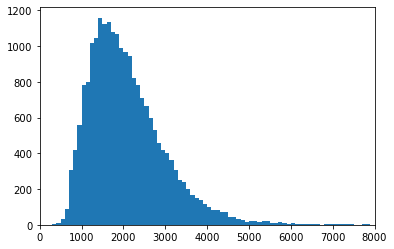

In [6]:
bins = np.arange(0, df['sqft_living'].max(), 100)
plt.hist(df['sqft_living'], bins=bins)
plt.xlim(0, 8000);

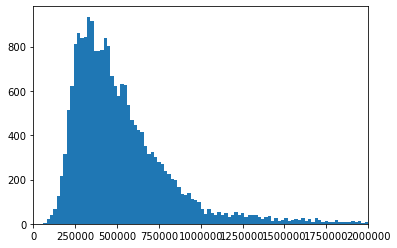

In [7]:
bins = np.arange(0, df['price'].max(), 20000)
plt.hist(df['price'], bins=bins);
plt.xlim(0, 2000000);

In [8]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

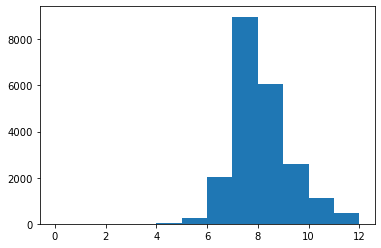

In [9]:
bins = np.arange(0, df['grade'].max(), 1)
plt.hist(df['grade'], bins=bins);

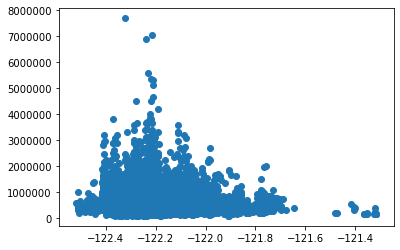

In [11]:
plt.scatter(df['long'], df['price']);

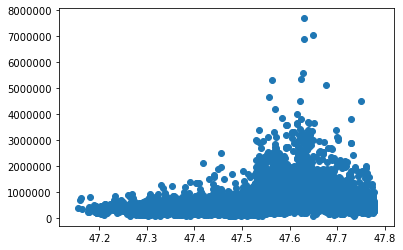

In [12]:
plt.scatter(df['lat'], df['price']);

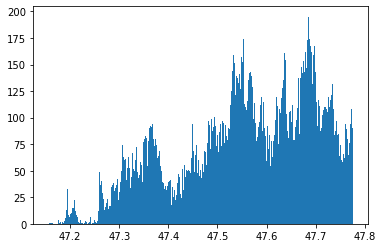

In [23]:
bins=np.arange(df['lat'].min(), df['lat'].max(), 0.002)
plt.hist(df['lat'], bins=bins);

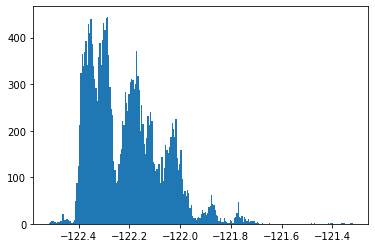

In [20]:
bins=np.arange(df['long'].min(), df['long'].max(), 0.005)
plt.hist(df['long'], bins=bins);

Perguntas:

    1 - Qual eh a regiao onde mais casas sao vendidas? Qual eh o preco medio das casas nessa regiao?
    
    2 - Onde ficam as casas mais caras? Existe algum padrao nas casas mais caras?(numero de quartos, area construida, pisos)
    
    3 - Onde ficam as casas mais antigas e as mais novas?

### 1 - Qual eh a regiao onde mais casas sao vendidas? Qual eh o preco medio das casas nessa regiao?


In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


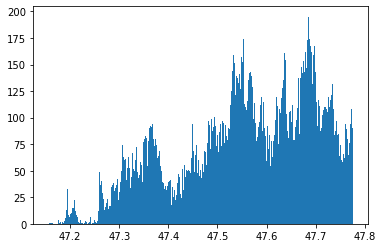

In [25]:
bins=np.arange(df['lat'].min(), df['lat'].max(), 0.002)
plt.hist(df['lat'], bins=bins);